In [1]:
!rm -rf *
!gdown --id 1nB_hn_ByoAP6hod3Nd7wlSf-43gPz31X
!unzip ml-1m.zip
!gdown --id 11xsjOjSV_oc9SXjD5CHh1bE8TwA81Tmv
!unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1nB_hn_ByoAP6hod3Nd7wlSf-43gPz31X
To: /content/ml-1m.zip
100% 5.92M/5.92M [00:00<00:00, 22.5MB/s]
Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         
Downloading...
From: https://drive.google.com/uc?id=11xsjOjSV_oc9SXjD5CHh1bE8TwA81Tmv
To: /content/data.zip
100% 18.0M/18.0M [00:00<00:00, 43.5MB/s]
Archive:  data.zip
   creating: data/.ipynb_checkpoints/
  inflating: data/.ipynb_checkpoints/preprocess-1m-checkpoint.ipynb  
  inflating: data/.ipynb_checkpoints/preprocess-checkpoint.ipynb  
   creating: data/100k/
  inflating: data/100k/movie_cluster_100k.json  
  inflating: data/100k/movie_neighbor_100k.json  
  inflating: data/100k/movie_neighbor_100k_2.json  
  inflating: data/100k/test_100k.json  
  inflating: data/100k/train_100k.json  
  inflating: data/100k/user_cluster_100k.json  
  inflating

In [2]:
import pandas as pd
import json
import numpy as np
import itertools

def json2df(path):
    data = json.load(open(path,"r"))
    df = pd.DataFrame.from_dict(data)
    df = df.rename(columns={'users': 'user_id', 'items': 'item_id'})
    df.user_id= df.user_id.astype(np.int64)
    df.item_id= df.item_id.astype(np.int64)
    df.rating = df.rating.astype(np.float32)
    return df


In [3]:
def movie_preprocessing(movie):
    movie_col = list(movie.columns)
    movie_tag = [doc.split('|') for doc in movie['tag']]
    tag_table = {token: idx for idx, token in enumerate(set(itertools.chain.from_iterable(movie_tag)))}
    movie_tag = pd.DataFrame(movie_tag)
    tag_table = pd.DataFrame(tag_table.items())
    tag_table.columns = ['Tag', 'Index']

    genre_vecs = [];
    for i in range(len(movie)):
        genre_vec = []
        for j in range(len(tag_table)):
            if tag_table['Tag'][j] in list(movie_tag.iloc[i, :]):
                genre_vec.append(1)
            else:
                genre_vec.append(0);
        genre_vecs.append(genre_vec)
    
    movie['genre_vec'] = genre_vecs;
    movie = movie.drop('tag', 1)
    movie = movie.drop('item_name', 1)
    return movie


In [4]:
 # read and preprocess the movie data
movies = pd.read_table('ml-1m/movies.dat', sep='::', names=['item_id', 'item_name', 'tag'], engine='python')
movies = movie_preprocessing(movies)
movies

,item_id,genre_vec
0,1,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,3,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,5,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
3878,3948,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3879,3949,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3880,3950,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3881,3951,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [5]:
train = json2df("data/1m/train_1m.json")
test = json2df("data/1m/test_1m.json")

In [6]:
train = train.merge(movies, how='inner', on='item_id')
test = test.merge(movies, how='inner', on='item_id')
dataset= train.append(test, ignore_index=True)
dataset

,user_id,item_id,rating,genre_vec
0,5972,2407,3.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3998,2407,1.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1074,2407,4.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,380,2407,3.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2691,2407,4.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
900183,4516,1420,5.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
900184,4088,874,3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
900185,5795,591,1.0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
900186,4169,701,4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [7]:
import keras
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, concatenate, Dropout
from IPython.display import SVG

from keras.utils.vis_utils import model_to_dot
n_users, n_movies = dataset.user_id.max(), dataset.item_id.max()
n_latent_factors = 12

In [8]:
import keras.backend as K

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

genre_input = keras.layers.Input(len(train.genre_vec[0]),name='Genre')
genre_embedding = keras.layers.Embedding(len(train.genre_vec[0]), 19, name='Genre-Embedding')(genre_input)
genre_vec = keras.layers.Flatten(name='FlattenGenres')(genre_embedding)

concat = concatenate([movie_vec, genre_vec])
dense_1 = Dense(12, name ='Fully-Connected1', activation='relu')(concat)

concat2=  concatenate([dense_1, user_vec])
dense_2 = Dense(16, name ='Fully-Connected2', activation='relu')(concat2)
dense_3 = Dense(12, name ='Fully-Connected3', activation='relu')(dense_2)
prod = Dense(1, name ='Fully-Connected4', activation='relu')(dense_3)
model = keras.Model([user_input, movie_input, genre_input], prod)

        
model.compile(optimizer= 'adam', loss= rmse, metrics=['mean_absolute_error', 'mse', rmse])

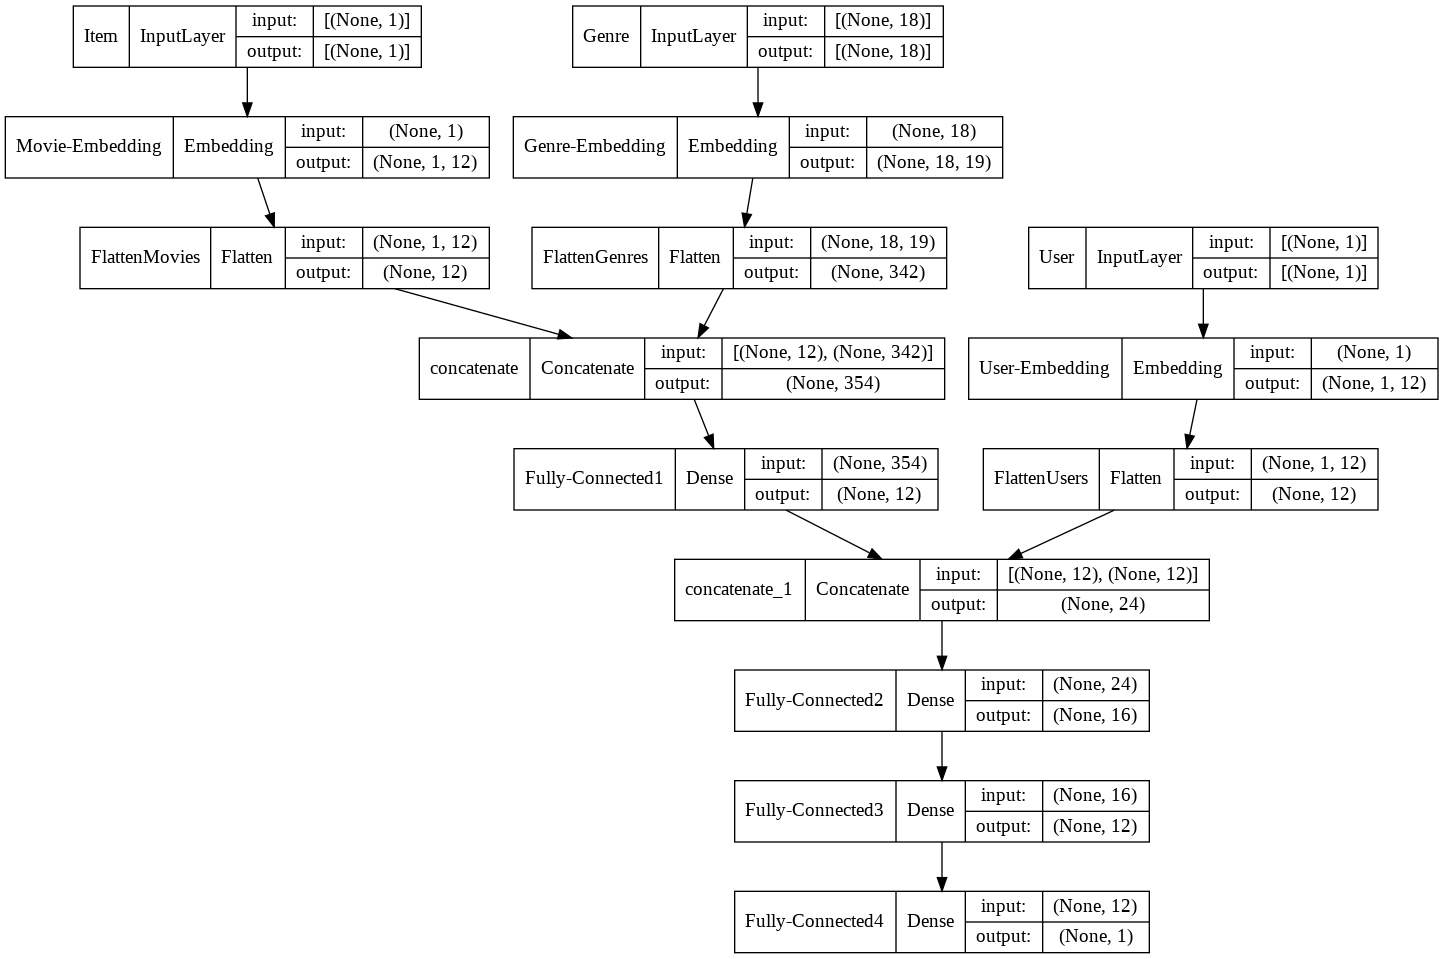

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Item (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Genre (InputLayer)             [(None, 18)]         0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 12)        47436       ['Item[0][0]']                   
                                                                                                  
 Genre-Embedding (Embedding)    (None, 18, 19)       342         ['Genre[0][0]']                  
                                                                                              

In [11]:

from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2)
genreTrain = np.asarray([np.asarray(row, dtype=float) for row in train.genre_vec], dtype=float)
genreVal = np.asarray([np.asarray(row, dtype=float) for row in val.genre_vec], dtype=float)
traindata = {
  "User": train.user_id,
  "Item": train.item_id,
  "Genre": genreTrain
}

valdata = {
  "User": val.user_id,
  "Item": val.item_id,
  "Genre": genreVal
}
history = model.fit(traindata, train.rating, validation_data=(valdata, val.rating), epochs=10, verbose=1)

Epoch 1/10
20005/20005 [==============================] - 62s 3ms/step - loss: 0.9321 - mean_absolute_error: 0.7461 - mse: 0.8967 - rmse: 0.9321 - val_loss: 0.8978 - val_mean_absolute_error: 0.7147 - val_mse: 0.8209 - val_rmse: 0.8977
Epoch 2/10
20005/20005 [==============================] - 57s 3ms/step - loss: 0.8931 - mean_absolute_error: 0.7098 - mse: 0.8123 - rmse: 0.8931 - val_loss: 0.8880 - val_mean_absolute_error: 0.7073 - val_mse: 0.8030 - val_rmse: 0.8879
Epoch 3/10
20005/20005 [==============================] - 55s 3ms/step - loss: 0.8813 - mean_absolute_error: 0.6992 - mse: 0.7915 - rmse: 0.8813 - val_loss: 0.8814 - val_mean_absolute_error: 0.7012 - val_mse: 0.7913 - val_rmse: 0.8813
Epoch 4/10
20005/20005 [==============================] - 54s 3ms/step - loss: 0.8724 - mean_absolute_error: 0.6914 - mse: 0.7757 - rmse: 0.8724 - val_loss: 0.8763 - val_mean_absolute_error: 0.6948 - val_mse: 0.7826 - val_rmse: 0.8762
Epoch 5/10
20005/20005 [==============================] - 54

In [12]:
genre = np.asarray([np.asarray(row, dtype=float) for row in test.genre_vec], dtype=float)
testData =  {
  "User": test.user_id,
  "Item": test.item_id,
  "Genre": genre
}
score = model.evaluate(testData, test.rating, batch_size=test.user_id.size, verbose=1)

1/1 [==============================] - 0s 330ms/step - loss: 0.8874 - mean_absolute_error: 0.6896 - mse: 0.7875 - rmse: 0.8874
